## Import libraries

In [50]:
import os
from glob import glob
import random
from tqdm.notebook import tqdm
import numpy as np
import pickle

import cv2
from PIL import Image
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [54]:
from embedding_model import EmbeddingModel

## Define initial variables

In [45]:
IMGS_FOLDER = 'flickr_images/15K Nocturna Valencia Banco Mediolanum/'

EMBEDDINGS_PATH = 'flickr_images/15K_Nocturna_Valencia_Banco_Mediolanum_embeddings.pkl'

## Load model

In [47]:
embed_model = EmbeddingModel()

## Load image embeddings

In [48]:
# Load image embeddings from disk. Each item of the dict will contain 
# the name of the image as a key, and the numpy array of the embedding as a value

with open(EMBEDDINGS_PATH, 'rb') as handle:
    embed_dict = pickle.load(handle)

print('Number of items: ', len(embed_dict.keys()))
print(list(embed_dict.keys())[:5])

img_names_list = list(embed_dict.keys())
img_embeddings_np = np.array(list(embed_dict.values()))

print('embeddings_np.shape: ', img_embeddings_np.shape)

Number of items:  909
['1-2219-15KNocturna-2022-105_52404455044.jpg', '1-2219-15KNocturna-2022-127_52403659997.jpg', '1-2219-15KNocturna-2022-130_52404667173.jpg', '1-2219-15KNocturna-2022-132_52404667153.jpg', '1-2219-15KNocturna-2022-144_52404454954.jpg']
embeddings_np.shape:  (909, 512)


## Make a query

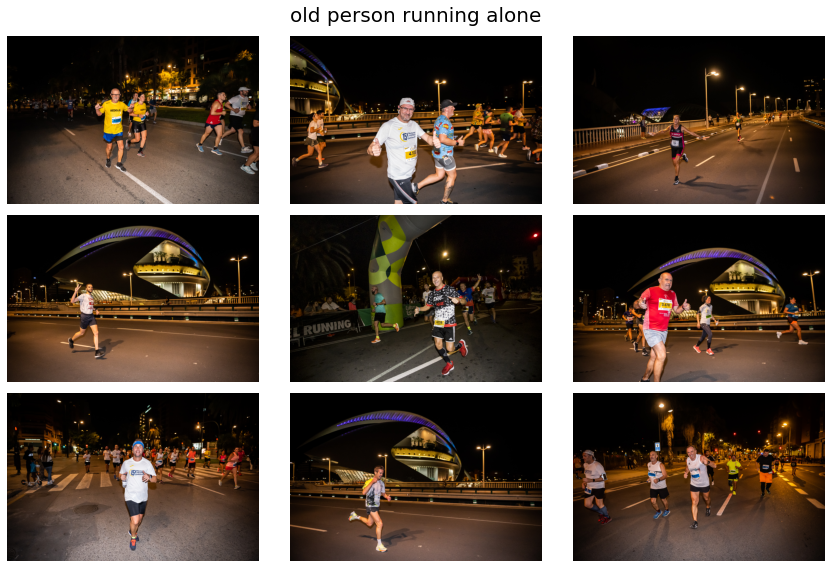

In [49]:
text_search = 'old person running alone'

indexes = embed_model.get_similar_images_indexes(img_embeddings_np, text_search, n=9)

target_img_filenames = [img_names_list[index] for index in indexes]
target_img_paths = [(IMGS_FOLDER + img_name) for img_name in target_img_filenames]

fig, axes = plt.subplots(3,3, figsize=(12,8))
for i, img in enumerate(target_img_paths):
    img = Image.open(img)

    axes[i//3, i%3].imshow(img)
    axes[i//3, i%3].axis('off')

plt.suptitle(text_search, fontsize=20)
plt.tight_layout()
plt.show()